# FORMULA 1

### Importing the necessary libraries 

In [205]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
import plotly.graph_objects as go

### Loading the datasets


In [206]:
constructors = pd.read_csv("E:\datasets\F1 1950 - 2024\constructors.csv")
constructor_standings = pd.read_csv("E:\datasets\F1 1950 - 2024\constructor_standings.csv")
races = pd.read_csv(r"E:\datasets\F1 1950 - 2024\races.csv")
results = pd.read_csv(r"E:\datasets\F1 1950 - 2024\results.csv")
drivers = pd.read_csv("E:\datasets\F1 1950 - 2024\drivers.csv")

# pd.set_option('display.max_columns', 5) # Setting the max number of columns displayed to 5
pd.reset_option('display.max_columns')

#print("Constructor standings dataframe \n",constructor_standings.head())
#print("Constructors dataframe \n",constructors.head()) 
#print ("Races dataframe\n",races.head())
#print("Results dataframe \n",results.head())
#print("Drivers dataframe \n",drivers.head())

### Merging tables 


In [207]:
## Getting years in the constructor_standings dataframe from the races dataframe
races_years = races[["raceId","year"]]
constructor_standings_years = pd.merge(constructor_standings, races_years, on='raceId', how='left')
constructor_standings.head()

##  Getting constructor names to constructor_standings df from constructors df 
constructor_names = constructors[["constructorId","name"]]
constructor_standings = pd.merge(constructor_standings_years, constructor_names, on='constructorId', how='left')

##  Getting driver names to results df from drivers df 
driver_names = drivers[["driverId","forename","surname"]]
results_drivers = pd.merge(results, driver_names, on='driverId', how='left')

##  Getting circuit names to results df from circuits df 
race_names = races[["raceId","name"]]
results_circuits = pd.merge(results_drivers, race_names, on='raceId', how='left')
results.head()

##  Getting team names to results df from constructor_names df 
results_names = pd.merge(results_circuits, constructor_names, on='constructorId', how='left')

##  Getting years to results df from races df 
results = pd.merge(results_names, races_years, on='raceId', how='left')

In [208]:
## Renaming name_x and name_y columns

results.rename(columns={'name_x': 'circuit_name','name_y':'team_name'}, inplace=True)
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,forename,surname,circuit_name,team_name,year
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,1:27.452,218.300,1,Lewis,Hamilton,Australian Grand Prix,McLaren,2008
1,2,18,2,2,3,5,2,2,2,8.0,...,41,3,1:27.739,217.586,1,Nick,Heidfeld,Australian Grand Prix,BMW Sauber,2008
2,3,18,3,3,7,7,3,3,3,6.0,...,41,5,1:28.090,216.719,1,Nico,Rosberg,Australian Grand Prix,Williams,2008
3,4,18,4,4,5,11,4,4,4,5.0,...,58,7,1:28.603,215.464,1,Fernando,Alonso,Australian Grand Prix,Renault,2008
4,5,18,5,1,23,3,5,5,5,4.0,...,43,1,1:27.418,218.385,1,Heikki,Kovalainen,Australian Grand Prix,McLaren,2008


In [209]:
## Creating a column for full name and concatenating forename and surname
results['driver_name'] = results['forename'].str.cat(results['surname'], sep=' ')
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,rank,fastestLapTime,fastestLapSpeed,statusId,forename,surname,circuit_name,team_name,year,driver_name
0,1,18,1,1,22,1,1,1,1,10.0,...,2,1:27.452,218.300,1,Lewis,Hamilton,Australian Grand Prix,McLaren,2008,Lewis Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,3,1:27.739,217.586,1,Nick,Heidfeld,Australian Grand Prix,BMW Sauber,2008,Nick Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,5,1:28.090,216.719,1,Nico,Rosberg,Australian Grand Prix,Williams,2008,Nico Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,7,1:28.603,215.464,1,Fernando,Alonso,Australian Grand Prix,Renault,2008,Fernando Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,1,1:27.418,218.385,1,Heikki,Kovalainen,Australian Grand Prix,McLaren,2008,Heikki Kovalainen


In [210]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'forename', 'surname', 'circuit_name',
       'team_name', 'year', 'driver_name'],
      dtype='object')

In [211]:
## Dropping unnecessary columns in results dataframe
results.drop(['number','positionText','positionOrder','rank','statusId','forename','surname'], axis=1,inplace=True)
results.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,circuit_name,team_name,year,driver_name
0,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,39,1:27.452,218.300,Australian Grand Prix,McLaren,2008,Lewis Hamilton
1,2,18,2,2,5,2,8.0,58,+5.478,5696094,41,1:27.739,217.586,Australian Grand Prix,BMW Sauber,2008,Nick Heidfeld
2,3,18,3,3,7,3,6.0,58,+8.163,5698779,41,1:28.090,216.719,Australian Grand Prix,Williams,2008,Nico Rosberg
3,4,18,4,4,11,4,5.0,58,+17.181,5707797,58,1:28.603,215.464,Australian Grand Prix,Renault,2008,Fernando Alonso
4,5,18,5,1,3,5,4.0,58,+18.014,5708630,43,1:27.418,218.385,Australian Grand Prix,McLaren,2008,Heikki Kovalainen


In [212]:
constructor_standings.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'year', 'name'],
      dtype='object')

In [213]:
## Dropping unnecessary columns in constructor_standings dataframe
constructor_standings.drop(['positionText','position'],axis=1,inplace=True)
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,wins,year,name
0,1,18,1,14.0,1,2008,McLaren
1,2,18,2,8.0,0,2008,BMW Sauber
2,3,18,3,9.0,0,2008,Williams
3,4,18,4,5.0,0,2008,Renault
4,5,18,5,2.0,0,2008,Toro Rosso


In [214]:
# Checking shape of results table
results.shape

(26519, 17)

In [215]:
# Checking shape of constructor table
constructor_standings.shape

(13271, 7)

A blank in the position column means the driver did not qualify a position in the race meaning they did not finish the race. In F1 that is referred to as a DNF. I replaced the blanks with DNF

In [216]:
#Replace '\\N' in the positions table with 'DNF' 
results.position.replace('\\N', 'DNF', inplace=True)
results.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,circuit_name,team_name,year,driver_name
0,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,39,1:27.452,218.300,Australian Grand Prix,McLaren,2008,Lewis Hamilton
1,2,18,2,2,5,2,8.0,58,+5.478,5696094,41,1:27.739,217.586,Australian Grand Prix,BMW Sauber,2008,Nick Heidfeld
2,3,18,3,3,7,3,6.0,58,+8.163,5698779,41,1:28.090,216.719,Australian Grand Prix,Williams,2008,Nico Rosberg
3,4,18,4,4,11,4,5.0,58,+17.181,5707797,58,1:28.603,215.464,Australian Grand Prix,Renault,2008,Fernando Alonso
4,5,18,5,1,3,5,4.0,58,+18.014,5708630,43,1:27.418,218.385,Australian Grand Prix,McLaren,2008,Heikki Kovalainen


In [217]:
results.position.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', 'DNF', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33'],
      dtype=object)

In [218]:
results.replace('\\N', np.nan, inplace=True)
results.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,circuit_name,team_name,year,driver_name
0,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,39,1:27.452,218.300,Australian Grand Prix,McLaren,2008,Lewis Hamilton
1,2,18,2,2,5,2,8.0,58,+5.478,5696094,41,1:27.739,217.586,Australian Grand Prix,BMW Sauber,2008,Nick Heidfeld
2,3,18,3,3,7,3,6.0,58,+8.163,5698779,41,1:28.090,216.719,Australian Grand Prix,Williams,2008,Nico Rosberg
3,4,18,4,4,11,4,5.0,58,+17.181,5707797,58,1:28.603,215.464,Australian Grand Prix,Renault,2008,Fernando Alonso
4,5,18,5,1,3,5,4.0,58,+18.014,5708630,43,1:27.418,218.385,Australian Grand Prix,McLaren,2008,Heikki Kovalainen


In [219]:
results.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
grid                   0
position               0
points                 0
laps                   0
time               18986
milliseconds       18986
fastestLap         18499
fastestLapTime     18499
fastestLapSpeed    18499
circuit_name           0
team_name              0
year                   0
driver_name            0
dtype: int64

The fastestLapTime column is in minutes:seconds, I want to change it to seconds

In [220]:
# Creating a function to change the time for the fastestLapTime column to seconds

def lap_time_to_seconds(lap_time):
    # Check if the value is NaN (in case it's still a float or became 'nan' string)
    if pd.isna(lap_time) or lap_time.lower() == 'nan':
        return np.nan
    # Otherwise, split and convert to seconds
    minutes, seconds = lap_time.split(':')
    return int(minutes) * 60 + float(seconds)

# Apply conversion to the DataFrame
results['lap_time_seconds'] = results['fastestLapTime'].apply(lap_time_to_seconds)
results['lap_time_seconds'].max()


202.3

### Importing lap times tables

In [221]:
lap_times = pd.read_csv("E:\datasets\F1 1950 - 2024\lap_times.csv") 
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [222]:
## Creating a function to change the time column to seconds
def time_to_seconds(lap_time):
    # Check if the value is NaN (in case it's still a float or became 'nan' string)
    if pd.isna(lap_time) or lap_time.lower() == 'nan':
        return np.nan
    
    # Split the time by ':' and handle different scenarios
    parts = lap_time.split(':')
    
    if len(parts) == 2:  # Standard 'minutes:seconds' format
        minutes, seconds = parts
        return int(minutes) * 60 + float(seconds)
    elif len(parts) == 3:  # Format includes hours, e.g., 'hours:minutes:seconds'
        hours, minutes, seconds = parts
        return int(hours) * 3600 + int(minutes) * 60 + float(seconds)
    else:
        # Handle unexpected formats
        return np.nan  # or raise an error, depending on your needs

# Apply conversion of time to seconds
lap_times['lap_time_seconds'] = lap_times['time'].apply(time_to_seconds)
lap_times.head()


,raceId,driverId,lap,position,time,milliseconds,lap_time_seconds
0,841,20,1,1,1:38.109,98109,98.109
1,841,20,2,1,1:33.006,93006,93.006
2,841,20,3,1,1:32.713,92713,92.713
3,841,20,4,1,1:32.803,92803,92.803
4,841,20,5,1,1:32.342,92342,92.342


In [223]:
avg_lap_time = lap_times.groupby(['driverId','raceId'])['lap_time_seconds'].mean().reset_index()
avg_lap_time.head()

,driverId,raceId,lap_time_seconds
0,1,1,97.563759
1,1,2,109.398548
2,1,3,127.416982
3,1,4,97.022421
4,1,5,89.849477


#### Merging the avg_lap_time df and results df

In [224]:
## Combining results df and avg_lap_time df 

results = pd.merge(results, avg_lap_time, on=['raceId','driverId'], how='left')
results.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,circuit_name,team_name,year,driver_name,lap_time_seconds_x,lap_time_seconds_y
0,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,39,1:27.452,218.300,Australian Grand Prix,McLaren,2008,Lewis Hamilton,87.452,98.114069
1,2,18,2,2,5,2,8.0,58,+5.478,5696094,41,1:27.739,217.586,Australian Grand Prix,BMW Sauber,2008,Nick Heidfeld,87.739,98.208517
2,3,18,3,3,7,3,6.0,58,+8.163,5698779,41,1:28.090,216.719,Australian Grand Prix,Williams,2008,Nico Rosberg,88.090,98.254810
3,4,18,4,4,11,4,5.0,58,+17.181,5707797,58,1:28.603,215.464,Australian Grand Prix,Renault,2008,Fernando Alonso,88.603,98.410293
4,5,18,5,1,3,5,4.0,58,+18.014,5708630,43,1:27.418,218.385,Australian Grand Prix,McLaren,2008,Heikki Kovalainen,87.418,98.424655


In [225]:
## Renaming columns

results.rename(columns={'lap_time_seconds_x':'fastest_lap_time_seconds','lap_time_seconds_y':'avg_lap_time'},inplace=True)
results.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,circuit_name,team_name,year,driver_name,fastest_lap_time_seconds,avg_lap_time
0,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,39,1:27.452,218.300,Australian Grand Prix,McLaren,2008,Lewis Hamilton,87.452,98.114069
1,2,18,2,2,5,2,8.0,58,+5.478,5696094,41,1:27.739,217.586,Australian Grand Prix,BMW Sauber,2008,Nick Heidfeld,87.739,98.208517
2,3,18,3,3,7,3,6.0,58,+8.163,5698779,41,1:28.090,216.719,Australian Grand Prix,Williams,2008,Nico Rosberg,88.090,98.254810
3,4,18,4,4,11,4,5.0,58,+17.181,5707797,58,1:28.603,215.464,Australian Grand Prix,Renault,2008,Fernando Alonso,88.603,98.410293
4,5,18,5,1,3,5,4.0,58,+18.014,5708630,43,1:27.418,218.385,Australian Grand Prix,McLaren,2008,Heikki Kovalainen,87.418,98.424655


#### Importing Qualifying table


In [226]:
qualifying_df = pd.read_csv("E:\datasets\F1 1950 - 2024\qualifying.csv")
qualifying_df.replace('\\N', np.nan, inplace=True)
qualifying_df.isnull().sum()

qualifyId           0
raceId              0
driverId            0
constructorId       0
number              0
position            0
q1                154
q2               4585
q3               6740
dtype: int64

In [227]:
qualifying_df['q1'] = qualifying_df['q1'].apply(time_to_seconds)
qualifying_df['q2'] = qualifying_df['q2'].apply(time_to_seconds)
qualifying_df['q3'] = qualifying_df['q3'].apply(time_to_seconds)


qualifying_df['q1'] = pd.to_numeric(qualifying_df['q1'], errors='coerce')
qualifying_df['q2'] = pd.to_numeric(qualifying_df['q2'], errors='coerce')
qualifying_df['q2'] = pd.to_numeric(qualifying_df['q3'], errors='coerce')
qualifying_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,86.572,86.714,86.714
1,2,18,9,2,4,2,86.103,86.869,86.869
2,3,18,5,1,23,3,85.664,87.079,87.079
3,4,18,13,6,2,4,85.994,87.178,87.178
4,5,18,2,2,3,5,85.960,87.236,87.236


In [228]:
# Creating a function to check if q2 or q3 is null, and calculating the average qualifying time
def avg_qualifying_time(qualifying):
    # Check each row for NaN values and calculate the average accordingly
    def calculate_avg(row):
        # Check the presence of 'q3' and 'q2' values
        if pd.notna(row['q3']) and pd.notna(row['q2']):
            return row[['q1', 'q2', 'q3']].mean()
        elif pd.isna(row['q3']) and pd.notna(row['q2']):
            return row[['q1', 'q2']].mean()
        else:
            return row['q1']
    
    # Apply the function row-wise to calculate the average qualifying time
    qualifying['avg_quali_time'] = qualifying.apply(calculate_avg, axis=1)
    return qualifying

# Assuming qualifying_df is your DataFrame with 'q1', 'q2', 'q3' columns
qualifying_df = avg_qualifying_time(qualifying_df)
qualifying_df.head()


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,avg_quali_time
0,1,18,1,1,22,1,86.572,86.714,86.714,86.666667
1,2,18,9,2,4,2,86.103,86.869,86.869,86.613667
2,3,18,5,1,23,3,85.664,87.079,87.079,86.607333
3,4,18,13,6,2,4,85.994,87.178,87.178,86.783333
4,5,18,2,2,3,5,85.960,87.236,87.236,86.810667


#### Combine qualifying_df with results df 


In [229]:
avg_quali_time = qualifying_df[["driverId","raceId","avg_quali_time"]]
results = pd.merge(results, avg_quali_time, on=['driverId','raceId'], how='left')
results.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,circuit_name,team_name,year,driver_name,fastest_lap_time_seconds,avg_lap_time,avg_quali_time
0,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,39,1:27.452,218.300,Australian Grand Prix,McLaren,2008,Lewis Hamilton,87.452,98.114069,86.666667
1,2,18,2,2,5,2,8.0,58,+5.478,5696094,41,1:27.739,217.586,Australian Grand Prix,BMW Sauber,2008,Nick Heidfeld,87.739,98.208517,86.810667
2,3,18,3,3,7,3,6.0,58,+8.163,5698779,41,1:28.090,216.719,Australian Grand Prix,Williams,2008,Nico Rosberg,88.090,98.254810,87.889667
3,4,18,4,4,11,4,5.0,58,+17.181,5707797,58,1:28.603,215.464,Australian Grand Prix,Renault,2008,Fernando Alonso,88.603,98.410293,86.907000
4,5,18,5,1,3,5,4.0,58,+18.014,5708630,43,1:27.418,218.385,Australian Grand Prix,McLaren,2008,Heikki Kovalainen,87.418,98.424655,86.607333


### Importing pit stops table 

In [230]:
pit_stops = pd.read_csv("E:\datasets\F1 1950 - 2024\pit_stops.csv") 

# Assigning all values in the stop column to 1 so that I can just do summation and group by driver Id and race Id 
# to get the number of pit stops a driver made in a race

pit_stops['stop'] = 1  
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10985,1132,807,1,39,16:06:28,30.265,30265
10986,1132,840,1,39,16:06:33,29.469,29469
10987,1132,839,1,38,16:06:52,29.086,29086
10988,1132,815,1,47,16:20:38,28.871,28871


In [231]:
total_pitstops = pit_stops.groupby(['raceId','driverId'])['stop'].sum().reset_index(name='no_of_pitstops')
total_pitstops.isnull().sum()

raceId            0
driverId          0
no_of_pitstops    0
dtype: int64

#### Merging the pitstops df and the results df

In [232]:
results = pd.merge(results,total_pitstops,on=['driverId','raceId'], how='left')
results.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,...,fastestLapTime,fastestLapSpeed,circuit_name,team_name,year,driver_name,fastest_lap_time_seconds,avg_lap_time,avg_quali_time,no_of_pitstops
0,1,18,1,1,1,1,10.0,58,1:34:50.616,5690616,...,1:27.452,218.300,Australian Grand Prix,McLaren,2008,Lewis Hamilton,87.452,98.114069,86.666667,NaN
1,2,18,2,2,5,2,8.0,58,+5.478,5696094,...,1:27.739,217.586,Australian Grand Prix,BMW Sauber,2008,Nick Heidfeld,87.739,98.208517,86.810667,NaN
2,3,18,3,3,7,3,6.0,58,+8.163,5698779,...,1:28.090,216.719,Australian Grand Prix,Williams,2008,Nico Rosberg,88.090,98.254810,87.889667,NaN
3,4,18,4,4,11,4,5.0,58,+17.181,5707797,...,1:28.603,215.464,Australian Grand Prix,Renault,2008,Fernando Alonso,88.603,98.410293,86.907000,NaN
4,5,18,5,1,3,5,4.0,58,+18.014,5708630,...,1:27.418,218.385,Australian Grand Prix,McLaren,2008,Heikki Kovalainen,87.418,98.424655,86.607333,NaN


In an F1 race, every driver has to pit at least once. I will therefore, replace null values in the pit stop column with 1

In [233]:
## Fill null values in the no_of_pitstops column with 1
results['no_of_pitstops'] = results['no_of_pitstops'].fillna(1) 
results['no_of_pitstops'].isnull().sum()

0

#### Over the years, some F1 teams have changed their names. For uniformity, I will set all previous team names that have changed, to what they are currently. 

#### List of teams that have changed names:

1. Toleman, Benetton, Renault, Lotus - Alpine

2. Jordan, Midland, Force India, Racing Point - Aston Martin

3. Tyrrell, BAR, Honda, Brawn - Mercedes

4. Minardi, Toro Rosso, AlphaTauri - RB
5. Stewart, Jaguar - Red Bull
6. Alfa Romeo - Sauber

In [234]:
results['team_name'].replace({'Toleman' : 'Alpine', 
                              'Benetton': 'Alpine', 
                              'Renault': 'Alpine', 
                              'Lotus':'Alpine',
                             'Jordan':'Aston Martin',
                             'Midland':'Aston Martin',
                             'Force India':'Aston Martin',
                             'Racing Point':'Aston Martin',
                             'Tyrell':'Mercedes',
                             'BAR':'Mercedes',
                             'Honda':'Mercedes',
                             'Brawn':'Mercedes',
                             'Minardi':'RB',
                             'Toro Rosso':'RB',
                             'AlphaTauri':'RB',
                             'Stewart':'Red Bull',
                             'Jaguar':'Red Bull',
                             'Alfa Romeo':'Sauber'}, inplace=True)

constructor_standings['name'].replace({'Toleman' : 'Alpine', 
                              'Benetton': 'Alpine', 
                              'Renault': 'Alpine', 
                              'Lotus':'Alpine',
                             'Jordan':'Aston Martin',
                             'Midland':'Aston Martin',
                             'Force India':'Aston Martin',
                             'Racing Point':'Aston Martin',
                             'Tyrell':'Mercedes',
                             'BAR':'Mercedes',
                             'Honda':'Mercedes',
                             'Brawn':'Mercedes',
                             'Minardi':'RB',
                             'Toro Rosso':'RB',
                             'AlphaTauri':'RB',
                             'Stewart':'Red Bull',
                             'Jaguar':'Red Bull',
                             'Alfa Romeo':'Sauber'}, inplace=True)

results['team_name'].unique()
constructor_standings['name'].unique()

array(['McLaren', 'BMW Sauber', 'Williams', 'Alpine', 'RB', 'Ferrari',
       'Toyota', 'Red Bull', 'Mercedes', 'Aston Martin', 'Super Aguri',
       'MF1', 'Spyker MF1', 'Sauber', 'Arrows', 'Prost', 'Tyrrell',
       'Lola', 'Ligier', 'Footwork', 'Forti', 'Pacific', 'Simtek',
       'Larrousse', 'Team Lotus', 'Brabham', 'Dallara', 'March',
       'Fondmetal', 'Coloni', 'Leyton House', 'AGS', 'Lambo', 'Euro Brun',
       'Osella', 'Onyx', 'Life', 'Rial', 'Zakspeed', 'RAM', 'Spirit',
       'ATS', 'Theodore', 'Fittipaldi', 'Ensign', 'Shadow', 'Merzario',
       'Wolf', 'Brabham-Alfa Romeo', 'Kauhsen', 'Rebaque', 'Brabham-Ford',
       'Hesketh', 'Surtees', 'Martini', 'BRM', 'Penske', 'LEC', 'McGuire',
       'Apollon', 'Boro', 'Kojima', 'Parnelli', 'Shadow-Ford',
       'Embassy Hill', 'Maki', 'Lyncar', 'Shadow-Matra', 'Iso Marlboro',
       'Amon', 'Trojan', 'Token', 'Tecno', 'Matra', 'Politoys', 'Connew',
       'March-Alfa Romeo', 'March-Ford', 'Lotus-Ford',
       'Lotus-Pratt &amp;

In [235]:
# Removing the 'F1 Team' substring from the team names

results['team_name'] = results['team_name'].str.replace(r' F1 Team','',regex=True)
constructor_standings['name'] = constructor_standings['name'].str.replace(r' F1 Team','',regex=True)

results['team_name'].unique()
constructor_standings['name'].unique()

array(['McLaren', 'BMW Sauber', 'Williams', 'Alpine', 'RB', 'Ferrari',
       'Toyota', 'Red Bull', 'Mercedes', 'Aston Martin', 'Super Aguri',
       'MF1', 'Spyker MF1', 'Sauber', 'Arrows', 'Prost', 'Tyrrell',
       'Lola', 'Ligier', 'Footwork', 'Forti', 'Pacific', 'Simtek',
       'Larrousse', 'Team Lotus', 'Brabham', 'Dallara', 'March',
       'Fondmetal', 'Coloni', 'Leyton House', 'AGS', 'Lambo', 'Euro Brun',
       'Osella', 'Onyx', 'Life', 'Rial', 'Zakspeed', 'RAM', 'Spirit',
       'ATS', 'Theodore', 'Fittipaldi', 'Ensign', 'Shadow', 'Merzario',
       'Wolf', 'Brabham-Alfa Romeo', 'Kauhsen', 'Rebaque', 'Brabham-Ford',
       'Hesketh', 'Surtees', 'Martini', 'BRM', 'Penske', 'LEC', 'McGuire',
       'Apollon', 'Boro', 'Kojima', 'Parnelli', 'Shadow-Ford',
       'Embassy Hill', 'Maki', 'Lyncar', 'Shadow-Matra', 'Iso Marlboro',
       'Amon', 'Trojan', 'Token', 'Tecno', 'Matra', 'Politoys', 'Connew',
       'March-Alfa Romeo', 'March-Ford', 'Lotus-Ford',
       'Lotus-Pratt &amp;

## DATA ANALYSIS

For my analysis, I decided to cover only the last 10 years. This is because since it began in 1950, F1 has undergone many changes in terms of regulations, car designs, engine evolution, and technological advancement. So to get a good analysis of the sport, especially in the specific areas I will be analysing, I thought it best to only cover 10 years because that reduces to some degree, the changes that have taken place. 

### Ranking the best drivers

In [236]:
## Filtering the results df and constructor_standings df by year from 2014 - 10 years ago
results = results.loc[results.year >= 2014]
constructor_standings = constructor_standings.loc[constructor_standings.year >=2014]
results.year.unique()
constructor_standings.year.unique()

array([2014, 2017, 2015, 2016, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int64)

In [237]:
top_drivers = results.groupby(['driver_name','year','team_name'])['points'].sum().sort_values(ascending=False).reset_index() 
top_drivers

,driver_name,year,team_name,points
0,Max Verstappen,2023,Red Bull,530.0
1,Max Verstappen,2022,Red Bull,433.0
2,Lewis Hamilton,2019,Mercedes,413.0
3,Lewis Hamilton,2018,Mercedes,408.0
4,Max Verstappen,2021,Red Bull,388.5
...,...,...,...,...
245,George Russell,2020,Williams,0.0
246,Nyck de Vries,2023,RB,0.0
247,Esteban Ocon,2016,Manor Marussia,0.0
248,Esteban Gutiérrez,2016,Haas,0.0


##### Max Verstappen is the driver who has garnered the most points in a single F1 season, and he has done it twice

In [238]:
## Who are the champions in the last 10 years?

# Getting the indices of the rows with maximum points for each year
max_points_indices = top_drivers.groupby('year')['points'].idxmax()

# Using these indices to select the corresponding rows from 'top_drivers'
champions = top_drivers.loc[max_points_indices]

# Sort by points in descending order and reset the index
champions = champions.sort_values(by='points', ascending=False).reset_index(drop=True)

# Display the top 11 champions
champions.head(11)


,driver_name,year,team_name,points
0,Max Verstappen,2023,Red Bull,530.0
1,Max Verstappen,2022,Red Bull,433.0
2,Lewis Hamilton,2019,Mercedes,413.0
3,Lewis Hamilton,2018,Mercedes,408.0
4,Max Verstappen,2021,Red Bull,388.5
5,Nico Rosberg,2016,Mercedes,385.0
6,Lewis Hamilton,2014,Mercedes,384.0
7,Lewis Hamilton,2015,Mercedes,381.0
8,Lewis Hamilton,2017,Mercedes,363.0
9,Lewis Hamilton,2020,Mercedes,347.0


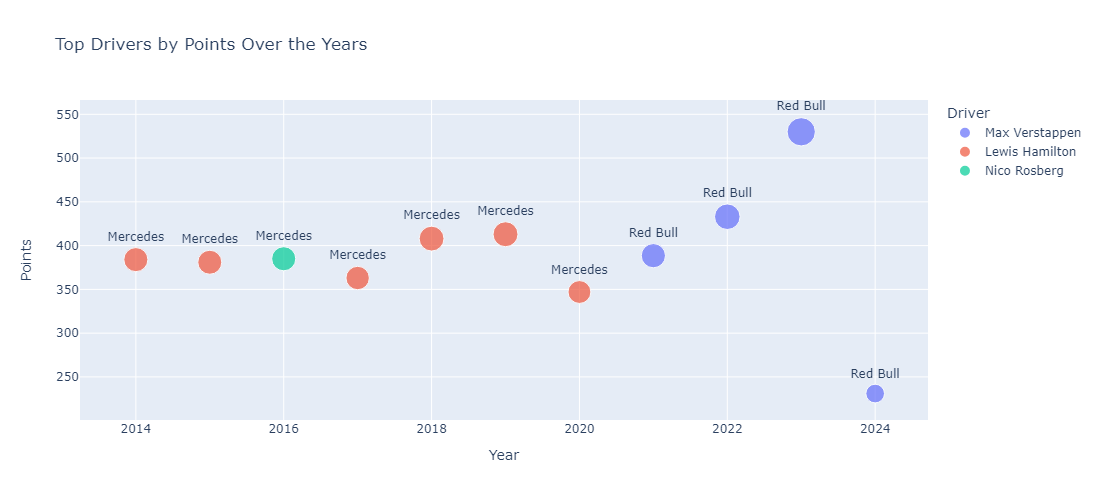

In [239]:
## Plotting a scatter plot of top drivers in the last 10 seasons 

fig = px.scatter(champions.head(11), 
                 x='year', 
                 y='points', 
                 size='points',  
                 color='driver_name', 
                 title='Top Drivers by Points Over the Years',
                 labels={'points': 'Points', 'year': 'Year', 'driver_name': 'Driver'},
                 hover_name='driver_name', 
                 text='team_name')
fig.update_traces(
    textposition='top center'  
)
fig.update_layout(
    height=500  
)
fig.show()

From the scatter plot above, we see that Lewis Hamilton has won most of the championships in the last 10 years, followed by Max Verstappen and only 1 by Nico Rosberg.
Interestingly, there have only been 3 drivers who won the championship in the last 10 years. 

In [240]:
top_3_drivers_each_year = (top_drivers
                           .sort_values(by=['year', 'points'], ascending=[True, False])  # Sort by year and points
                           .groupby('year')  # Group by year
                           .head(3)  # Select top 3 for each year
                           .reset_index(drop=True)) 
top_3_drivers_each_year.head()

,driver_name,year,team_name,points
0,Lewis Hamilton,2014,Mercedes,384.0
1,Nico Rosberg,2014,Mercedes,317.0
2,Daniel Ricciardo,2014,Red Bull,238.0
3,Lewis Hamilton,2015,Mercedes,381.0
4,Nico Rosberg,2015,Mercedes,322.0


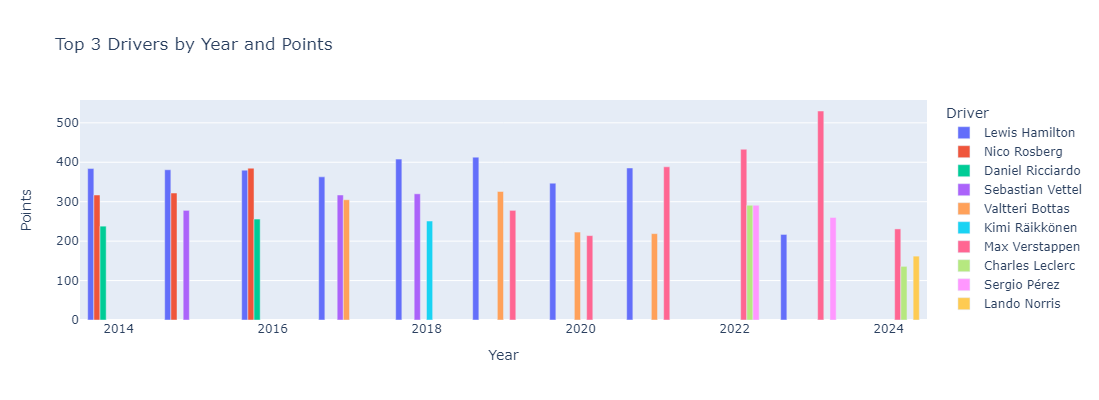

In [241]:
## Plotting a bar plot of top 3 drivers in the last 10 seasons 
fig = px.bar(top_3_drivers_each_year, 
             x='year', 
             y='points', 
             color='driver_name',  # Color by driver name to differentiate individual drivers
             title='Top 3 Drivers by Year and Points',
             labels={'points': 'Points', 'year': 'Year', 'driver_name': 'Driver', 'team_name': 'Team'},
             hover_data=['team_name'],  # Include team name in hover data
             barmode='group')  # Group bars by year for clear comparison

fig.update_layout(
    height=400  
)
fig.show()

### Ranking the best teams


In [242]:
top_teams = constructor_standings.groupby(['name','year'])['points'].sum().sort_values(ascending=False).reset_index()
top_teams.head()

,name,year,points
0,Red Bull,2023,10158.0
1,Mercedes,2019,8631.0
2,Red Bull,2022,8439.0
3,Mercedes,2016,8085.0
4,Mercedes,2015,7139.0


##### Red Bull team is the team that has earned the most points in a single F1 season. This makes sense because Max Verstappen is a Red Bull driver and constructor points are awarded to the winning drivers' teams

In [243]:
top_3_constructors_each_year = (top_teams
                           .sort_values(by=['year', 'points'], ascending=[True, False])  # Sort by year and points
                           .groupby('year')  # Group by year
                           .head(3)  # Select top 3 for each year
                           .reset_index(drop=True)) 
top_3_constructors_each_year.head()

,name,year,points
0,Mercedes,2014,6830.0
1,Red Bull,2014,3793.0
2,Williams,2014,2439.0
3,Mercedes,2015,7139.0
4,Ferrari,2015,4457.0


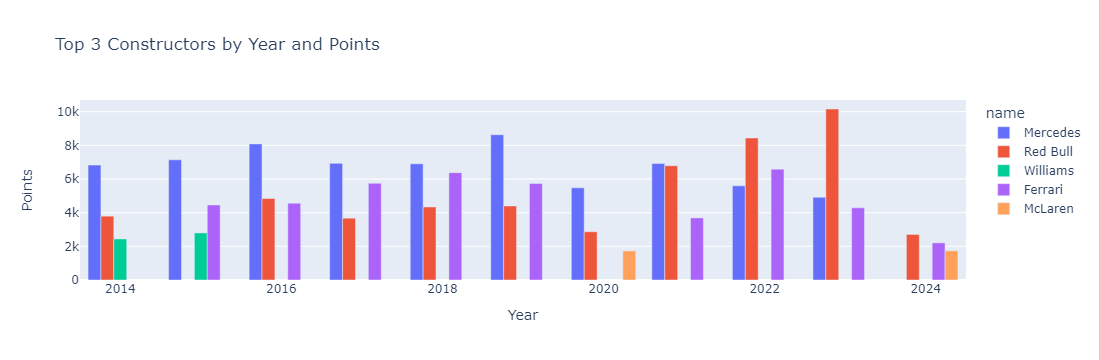

In [244]:
## Plotting a bar chart of top 3 constructors who won the championship
fig = px.bar(top_3_constructors_each_year, 
             x='year', 
             y='points', 
             color='name',  
             title='Top 3 Constructors by Year and Points',
             labels={'points': 'Points', 'year': 'Year', 'driver_name': 'Driver', 'team_name': 'Team'},
             hover_data=['name'], 
             barmode='group') 

# Show the plot
fig.show()

Mercedes has dominated the constructors championships in the last ten years having won 8 out of ten. We can also see that only two teams have won the championships, and that is Red Bull and Mercedes.

### Fastest track


In [245]:
fastest_track = results['fastest_lap_time_seconds'].dropna()
fastest_track = results.groupby(['year','circuit_name'])['fastest_lap_time_seconds'].mean().sort_values(ascending=False).reset_index()
fastest_track

,year,circuit_name,fastest_lap_time_seconds
0,2016,Belgian Grand Prix,114.862421
1,2015,Belgian Grand Prix,114.660000
2,2014,Japanese Grand Prix,113.874095
3,2014,Belgian Grand Prix,113.808150
4,2022,Singapore Grand Prix,113.553000
...,...,...,...
211,2017,Austrian Grand Prix,68.491778
212,2021,Austrian Grand Prix,68.485000
213,2020,Sakhir Grand Prix,57.122667
214,2021,Belgian Grand Prix,NaN


In [246]:
fastest_track_groupby = fastest_track.loc[fastest_track.groupby('year')['fastest_lap_time_seconds'].idxmin()].reset_index(drop=True)
fastest_track_groupby = fastest_track_groupby.sort_values(by='fastest_lap_time_seconds', ascending=False).reset_index(drop=True)
fastest_track_groupby

,year,circuit_name,fastest_lap_time_seconds
0,2015,Austrian Grand Prix,74.703235
1,2014,Austrian Grand Prix,73.430909
2,2016,Austrian Grand Prix,70.373773
3,2024,Austrian Grand Prix,69.579300
4,2022,Austrian Grand Prix,69.485700
5,2023,Austrian Grand Prix,69.294600
6,2019,Austrian Grand Prix,68.819150
7,2018,Austrian Grand Prix,68.541050
8,2017,Austrian Grand Prix,68.491778
9,2021,Austrian Grand Prix,68.485000


fastest_track['fastest_lap_time_seconds'].min()

In [247]:
row = fastest_track[np.isclose(fastest_track['fastest_lap_time_seconds'], 57.122667)]
print(row)

     year       circuit_name  fastest_lap_time_seconds
213  2020  Sakhir Grand Prix                 57.122667


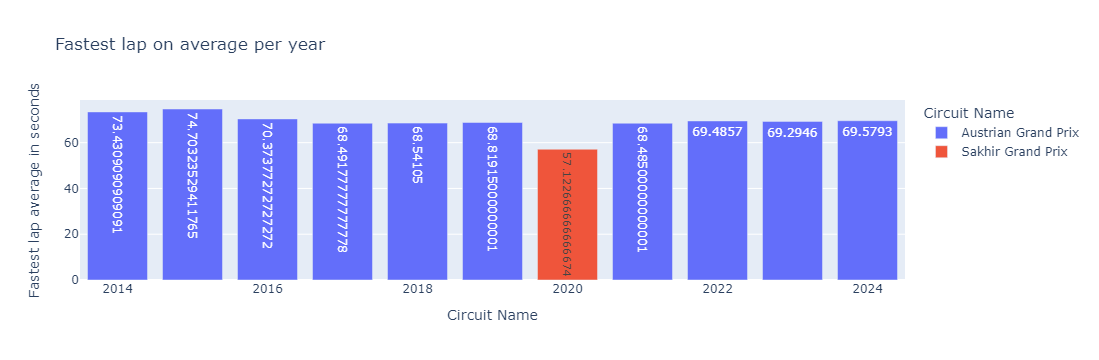

In [248]:
fig = px.bar(fastest_track_groupby, x='year', y='fastest_lap_time_seconds', color='circuit_name',
             title='Fastest lap on average per year',
             labels={'circuit_name': 'Circuit Name', 'fastest_lap_time_seconds': 'Fastest lap average in seconds'},
             text='fastest_lap_time_seconds' 
             )

fig.update_layout(
    xaxis_title='Circuit Name',
    yaxis_title='Fastest lap average in seconds',
    bargap=0.2  
)

# Show the plot
fig.show()

In [249]:
fastest_track_max = fastest_track.loc[fastest_track.groupby('year')['fastest_lap_time_seconds'].idxmax()].reset_index(drop=True)
fastest_track_max = fastest_track_max.sort_values(by='year', ascending=False).reset_index(drop=True)
fastest_track_max

,year,circuit_name,fastest_lap_time_seconds
0,2024,Chinese Grand Prix,99.997300
1,2023,Belgian Grand Prix,110.541947
2,2022,Singapore Grand Prix,113.553000
3,2021,Azerbaijan Grand Prix,105.928350
4,2020,Belgian Grand Prix,108.940474
5,2019,Belgian Grand Prix,108.226167
6,2018,Belgian Grand Prix,108.505941
7,2017,Singapore Grand Prix,110.208882
8,2016,Belgian Grand Prix,114.862421
9,2015,Belgian Grand Prix,114.660000


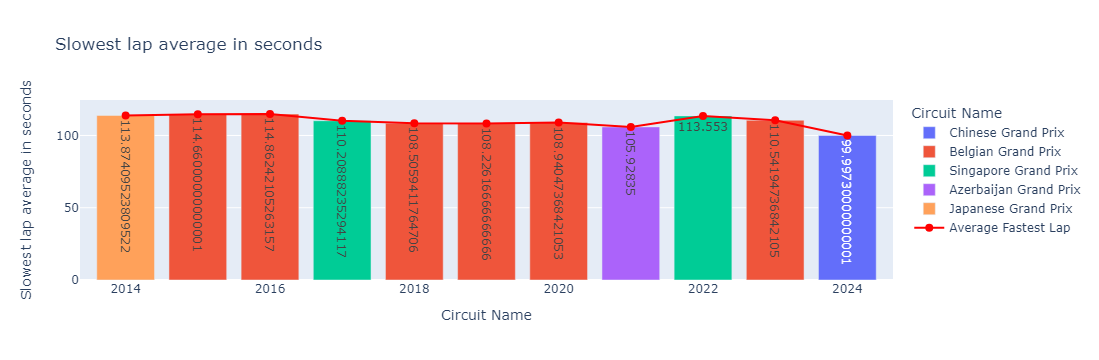

In [250]:
fig = px.bar(fastest_track_max, x='year', y='fastest_lap_time_seconds', color='circuit_name',
             title='Slowest lap average in seconds',
             labels={'circuit_name': 'Circuit Name', 'fastest_lap_time_seconds': 'Fastest lap average in seconds'},
             text='fastest_lap_time_seconds' 
             )

fig.add_trace(
    go.Scatter(
        x=fastest_track_max['year'], 
        y=fastest_track_max['fastest_lap_time_seconds'],
        mode='lines+markers',
        name='Average Fastest Lap',
        line=dict(color='red', width=2),  # Customize line color and width
        marker=dict(size=8)  # Customize marker size
    )
)

fig.update_layout(
    xaxis_title='Circuit Name',
    yaxis_title='Slowest lap average in seconds',
    bargap=0.2  
)

# Show the plot
fig.show()

Sakhir Grand Prix had the fastest lap time on average in 2020. While the Belgian GP in 2016 had the slowest fastest lap on average

### Most DNF's


In [251]:
result_dnf = results[results['position']=='DNF']
result_dnf = results.groupby(['driver_name','team_name'])['position'].size().sort_values(ascending=False).reset_index(name='dnf_count')
result_dnf.head(10)

,driver_name,team_name,dnf_count
0,Lewis Hamilton,Mercedes,215
1,Max Verstappen,Red Bull,174
2,Sergio Pérez,Aston Martin,136
3,Kevin Magnussen,Haas,135
4,Sebastian Vettel,Ferrari,119
5,Lando Norris,McLaren,116
6,Charles Leclerc,Ferrari,116
7,Lance Stroll,Aston Martin,115
8,Valtteri Bottas,Mercedes,101
9,Daniel Ricciardo,Red Bull,100


In [252]:
result_dnf_2 = result_dnf.groupby(['driver_name'])['dnf_count'].sum().sort_values(ascending=False).reset_index(name='total_dnf_count')
result_dnf_2.head()

,driver_name,total_dnf_count
0,Valtteri Bottas,216
1,Lewis Hamilton,215
2,Sergio Pérez,214
3,Daniel Ricciardo,201
4,Max Verstappen,197


In [253]:
result_dnf_2['total_dnf_count'].min()

1

In Formula 1, when a driver does not complete a race for any reason like getting involved in a crash or his car having a malfunctin that causes him to retire from the race, they are qualified as DNF, which is Did Not Finish. From the analysis above, Piercarlo Ghinzani racing for the Osella team, is the driver with the most DNF's. It's also interesting to note that all drivers in F1 have had a DNF since the minimum dnf_count is 1.

#### Plot for most DNF finishes

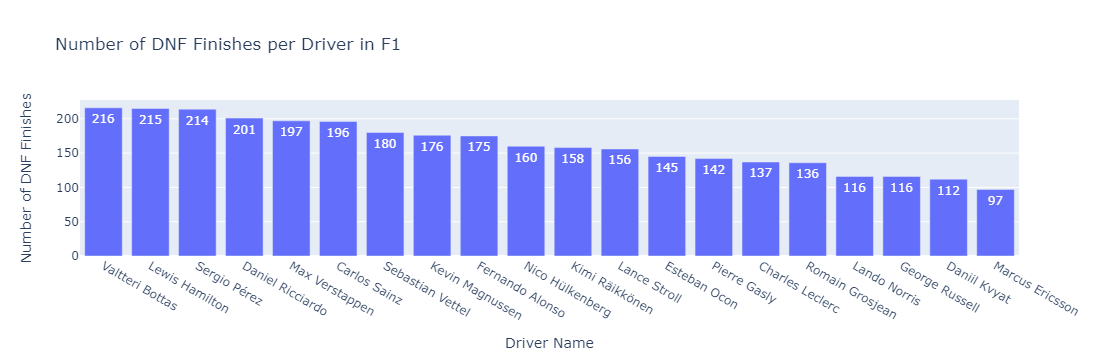

In [254]:
## Bar plot for drivers with the most DNF finishes

fig = px.bar(result_dnf_2.head(20), x='driver_name', y='total_dnf_count',
             title='Number of DNF Finishes per Driver in F1',
             labels={'dnf_count': 'Number of DNF Finishes', 'driver_name': 'Driver Name'},
             text='total_dnf_count' 
            )

fig.update_layout(
    xaxis_title='Driver Name',
    yaxis_title='Number of DNF Finishes',
    bargap=0.2  
)

# Show the plot
fig.show()

Lewis Hamilton has had the most DNF's in the last 10 years at 215. Sergio Perez comes in at a close second with 136 while at Aston Martin and 78 with Red Bull, a total of 214.

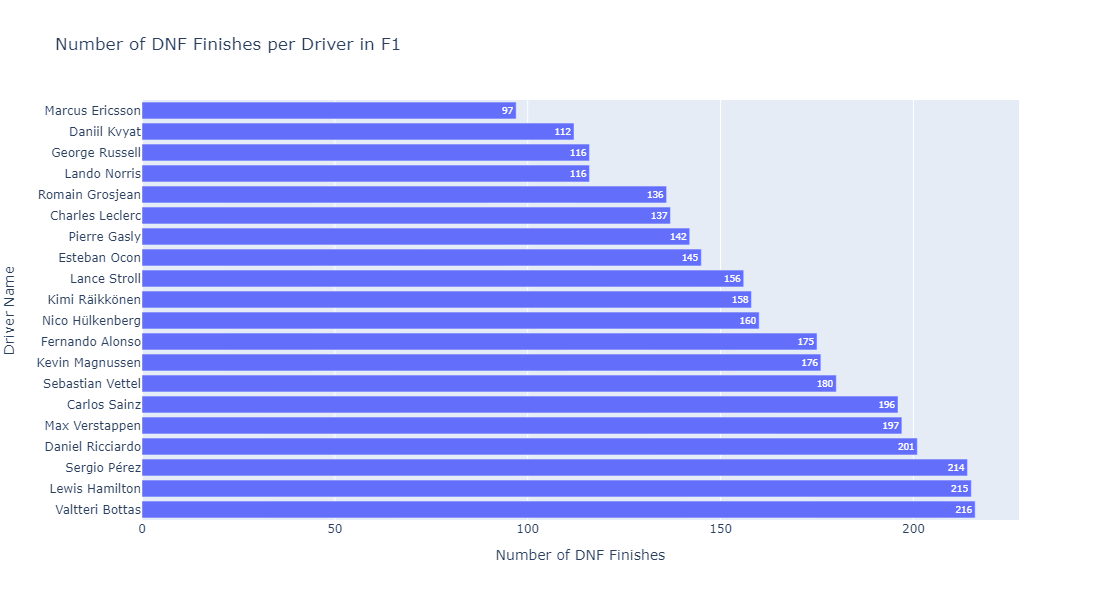

In [255]:
import plotly.express as px

# Creating a horizontal bar chart
fig = px.bar(
    result_dnf_2.head(20),  # Assuming 'dnf_data' is your DataFrame
    x='total_dnf_count', 
    y='driver_name',
    orientation='h',  # Horizontal bars
    title='Number of DNF Finishes per Driver in F1',
    labels={'total_dnf_count': 'Number of DNF Finishes', 'driver_name': 'Driver Name'},
    text='total_dnf_count'
)
fig.update_layout(
    height=600  
)
# Display the plot
fig.show()


### Most improved driver


In [256]:
## Removing drivers that have a DNF
most_improved = results[results['position'] != 'DNF']
most_improved = most_improved[most_improved['grid'] != 0]
most_improved.position.astype(int)
most_improved.position.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype=object)

The most improved driver is the driver who made the most significant gain in positions in a particular race. For this I needed to take the drivers' grid position, that is the position they started the race at, minus their finishing position. A challenge I have with this is that the grid column has some 0 values. Unfortunately, I cannot work with this because there is no 0 grid position and upon checking with the Formula 1 website, I found that some of the drivers that have the 0 position in the grid, actually had grid numbers. Since they are about 1600 records, I chose to not work with them, so I dropped those rows. I also dropped drivers with a DNF because they are not part of the study for most improved since they did not finish the race.

In [257]:
# Removing any whitespaces that the position column migh have

most_improved['position'] = most_improved['position'].str.strip()

# Convert 'position' column to integer
most_improved['position'] = pd.to_numeric(most_improved['position'], errors='coerce')

# Check dtype
print(most_improved['position'])
print(most_improved['position'].dtype)

22127     1
22128     2
22129     3
22130     4
22131     5
         ..
26511    13
26512    14
26513    15
26514    16
26516    18
Name: position, Length: 3635, dtype: int64
int64


In [258]:
most_improved['gained_positions'] = most_improved.grid - most_improved.position 
most_improved.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,...,fastestLapSpeed,circuit_name,team_name,year,driver_name,fastest_lap_time_seconds,avg_lap_time,avg_quali_time,no_of_pitstops,gained_positions
22127,22130,900,3,131,3,1,25.0,57,1:32:58.710,5578710,...,206.436,Australian Grand Prix,Mercedes,2014,Nico Rosberg,92.478,97.872105,100.584667,2.0,2
22128,22131,900,825,1,4,2,18.0,57,+26.777,5605487,...,205.131,Australian Grand Prix,McLaren,2014,Kevin Magnussen,93.066,98.341877,100.813000,2.0,2
22129,22132,900,18,1,10,3,15.0,57,+30.027,5608737,...,205.460,Australian Grand Prix,McLaren,2014,Jenson Button,92.917,98.398895,91.396000,2.0,7
22130,22133,900,4,6,5,4,12.0,57,+35.284,5613994,...,204.867,Australian Grand Prix,Ferrari,2014,Fernando Alonso,93.186,98.491123,101.008667,2.0,1
22131,22134,900,822,3,15,5,10.0,57,+47.639,5626349,...,206.128,Australian Grand Prix,Williams,2014,Valtteri Bottas,92.616,98.707877,102.631667,2.0,10


In [259]:
most_improved.sort_values(by='gained_positions', ascending=False, inplace=True) 
most_improved.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,...,fastestLapSpeed,circuit_name,team_name,year,driver_name,fastest_lap_time_seconds,avg_lap_time,avg_quali_time,no_of_pitstops,gained_positions
22349,22352,910,1,131,22,3,15.0,70,+5.857,6790915,...,180.494,Hungarian Grand Prix,Mercedes,2014,Lewis Hamilton,87.380,97.013071,NaN,2.0,19
23178,23183,960,1,131,21,3,15.0,44,+27.634,6318692,...,225.969,Belgian Grand Prix,Mercedes,2016,Lewis Hamilton,111.583,143.606636,110.033,3.0,18
25241,25247,1066,830,9,20,2,18.0,53,+53.271,5494272,...,213.959,Russian Grand Prix,Red Bull,2021,Max Verstappen,98.396,103.665509,NaN,2.0,18
24401,24407,1020,20,6,20,2,18.0,64,+7.333,6278608,...,214.423,German Grand Prix,Ferrari,2019,Sebastian Vettel,76.794,98.103250,NaN,5.0,18
24583,24588,1029,832,1,20,3,15.0,71,+8.896,5603574,...,212.039,Brazilian Grand Prix,McLaren,2019,Carlos Sainz,73.158,78.923577,NaN,1.0,17


From this we can see that the driver who gained the most places is Lewis Hamilton in 2014 Hungarian GP having gained 19 positions. He started at grid position 22, that is last, and finished the race at number 3 which is pretty remarkable. He comes in second as the driver with the most positions gained with 18 positions gained in the Belgian GP in 2016, from grid position 21 to position 3. 

### Average lap times over the years

In [260]:
result_time = results[['year','avg_lap_time']].dropna()
result_time.isnull().sum()

year            0
avg_lap_time    0
dtype: int64

In [261]:
result_time['avg_lap_time'] = pd.to_numeric(result_time['avg_lap_time'], errors='coerce')
result_time['avg_lap_time'].dtype

dtype('float64')

In [262]:
# Groouping by the year and getting the average lap time per year
result_time_avg = result_time.groupby('year')['avg_lap_time'].mean().round(decimals=2).reset_index(name='average_time')
result_time_avg.sort_values(by='year')

,year,average_time
0,2014,108.34
1,2015,100.86
2,2016,104.52
3,2017,98.83
4,2018,95.98
5,2019,94.89
6,2020,99.82
7,2021,106.90
8,2022,101.31
9,2023,99.92


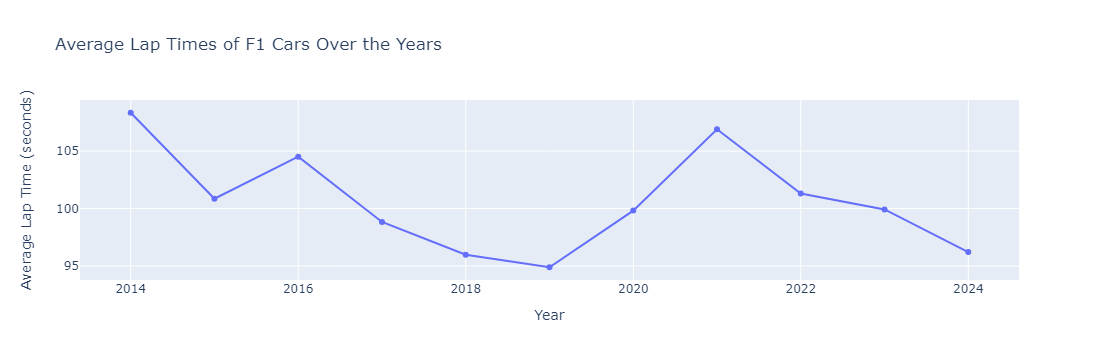

In [263]:
# Line chart for average lap time vs year
fig = px.line(result_time_avg, x='year', y='average_time', 
              title='Average Lap Times of F1 Cars Over the Years',
              labels={'year': 'Year', 'average_time': 'Average Lap Time (seconds)'},
              markers=True)

fig.show()

The chart shows the trend of average lap times of F1 cars from 2014 to 2024, revealing significant fluctuations over the years without a consistent pattern of improvement or decline. The average lap time peaked in 2014, indicating slower lap times that year, followed by a pattern of alternating decreases and increases, with another notable peak around 2020. 
After 2020, the average lap times show a steady decline through 2024, which has the lowest average lap time in the period, suggesting improved performance. These variations can be attributed to multiple factors, including changes in car technology, regulations, tire performance, weather conditions, and track modifications. The chart highlights the dynamic nature of F1 car performance over the decade, influenced by a complex interplay of variables within and beyond the control of teams and drivers.

### Lap Speeds Over The Years

In [264]:
result_speed = results[['year','fastestLapSpeed']].dropna()
result_speed.isnull().sum()

year               0
fastestLapSpeed    0
dtype: int64

In [265]:
result_speed['fastestLapSpeed'] = pd.to_numeric(result_speed['fastestLapSpeed'], errors='coerce')
result_speed['fastestLapSpeed'].dtype

dtype('float64')

In [266]:
# Groouping by the year and getting the average fastest lap speed per year
result_speed_avg = result_speed.groupby('year')['fastestLapSpeed'].mean().round(decimals=2).reset_index(name='average_speed')
result_speed_avg.sort_values(by='year')

,year,average_speed
0,2014,194.29
1,2015,194.94
2,2016,197.62
3,2017,205.42
4,2018,207.71
5,2019,208.14
6,2020,216.29
7,2021,211.70
8,2022,205.78
9,2023,211.24


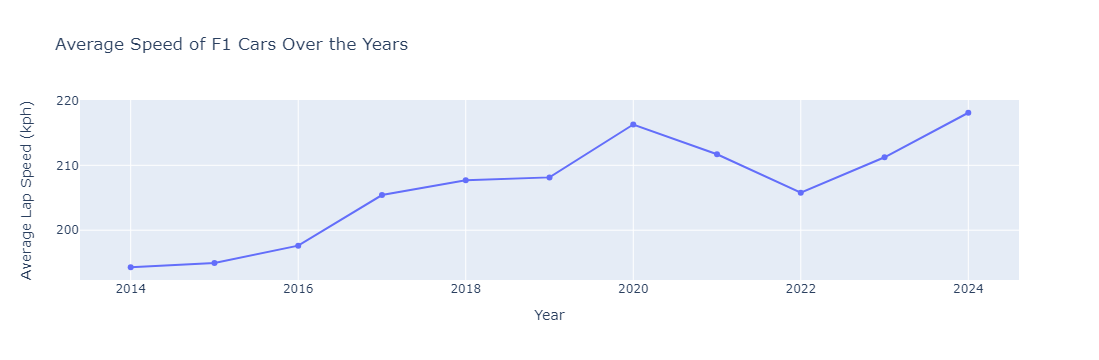

In [267]:
# Line chart for average speed vs year
fig = px.line(result_speed_avg, x='year', y='average_speed', 
              title='Average Speed of F1 Cars Over the Years',
              labels={'year': 'Year', 'average_speed': 'Average Lap Speed (kph)'},
              markers=True)

fig.show()

The average lap speeds generally increased over the 10 years. The speed graph shows a steady upward trend, with minor fluctuations around 2020 and 2022.
There is an inverse relationship between the Average Lap Times of F1 Cars Over the Years and the Average Speed of F1 Cars Over the Years graphs. As lap times decrease, lap speeds increase. This reflects advancements in car technology, aerodynamics, and regulations that have allowed cars to become faster and more efficient. The improvements are most evident in the later years, where lap speeds peak and times reach their lowest. This comparison highlights how improvements in technology and engineering in F1 directly translate to better on-track performance, with faster lap speeds resulting in shorter lap times.

### Driver with the most podium finishes

In [268]:
## Filtering drivers who finished top 3

result_podium = results.loc[(results.position == '1')  | (results.position == '2') | (results.position == '3')]
result_podium.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,...,fastestLapTime,fastestLapSpeed,circuit_name,team_name,year,driver_name,fastest_lap_time_seconds,avg_lap_time,avg_quali_time,no_of_pitstops
22127,22130,900,3,131,3,1,25.0,57,1:32:58.710,5578710,...,1:32.478,206.436,Australian Grand Prix,Mercedes,2014,Nico Rosberg,92.478,97.872105,100.584667,2.0
22128,22131,900,825,1,4,2,18.0,57,+26.777,5605487,...,1:33.066,205.131,Australian Grand Prix,McLaren,2014,Kevin Magnussen,93.066,98.341877,100.813000,2.0
22129,22132,900,18,1,10,3,15.0,57,+30.027,5608737,...,1:32.917,205.460,Australian Grand Prix,McLaren,2014,Jenson Button,92.917,98.398895,91.396000,2.0
22149,22152,901,1,131,1,1,25.0,56,1:40:25.974,6025974,...,1:43.066,193.611,Malaysian Grand Prix,Mercedes,2014,Lewis Hamilton,103.066,107.606679,118.688000,3.0
22150,22153,901,3,131,3,2,18.0,56,+17.313,6043287,...,1:43.960,191.946,Malaysian Grand Prix,Mercedes,2014,Nico Rosberg,103.960,107.915839,119.094333,3.0


In [269]:
# Using group by to count the number of podium finishes per driver
result_podium_groupby = result_podium.groupby(['driver_name','team_name'])['position'].size().sort_values(ascending=False).reset_index(name='podium_count')

In [270]:
result_podium_groupby.head()

,driver_name,team_name,podium_count
0,Lewis Hamilton,Mercedes,145
1,Max Verstappen,Red Bull,107
2,Valtteri Bottas,Mercedes,58
3,Sebastian Vettel,Ferrari,55
4,Nico Rosberg,Mercedes,46


### Plotting a bar chart of drivers and the number of podium finishes

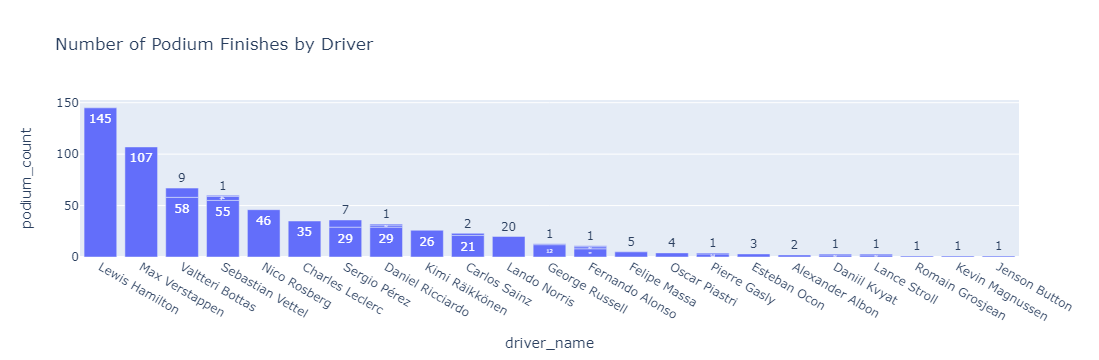

In [271]:
fig = px.bar(result_podium_groupby, x='driver_name', y='podium_count', 
             title='Number of Podium Finishes by Driver',
             labels={'driver': 'Driver', 'podium': 'Number of Podium Finishes'},
            text='podium_count')

fig.show()

Lewis Hamilton has the highest number of podium finishes followed by Max Verstappen. Romain Grosjean, Kevin Magnussen and Jenson Button	have only finished top 3 once in the last 10 years.

## HYPOTHESIS TESTING

### Null Hypothesis (H₀):
There is no correlation (or zero correlation) between the qualifying position and the final race position of drivers.

 H₀ : ρ=0

where 𝜌 (rho) is the Spearman correlation coefficient. 

This hypothesis assumes that the qualifying position does not influence the final race position.

### Alternative Hypothesis (H₁):
There is a correlation between the qualifying position and the final race position of drivers.
 
 H₁ : ρ != 0


In [272]:
results_final = results.loc[(results['grid'].notna()) & (results['position'].notna()) & (results['position'] != 'DNF') & (results['grid'] != 0)]
results_final.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,time,milliseconds,...,fastestLapTime,fastestLapSpeed,circuit_name,team_name,year,driver_name,fastest_lap_time_seconds,avg_lap_time,avg_quali_time,no_of_pitstops
22127,22130,900,3,131,3,1,25.0,57,1:32:58.710,5578710,...,1:32.478,206.436,Australian Grand Prix,Mercedes,2014,Nico Rosberg,92.478,97.872105,100.584667,2.0
22128,22131,900,825,1,4,2,18.0,57,+26.777,5605487,...,1:33.066,205.131,Australian Grand Prix,McLaren,2014,Kevin Magnussen,93.066,98.341877,100.813000,2.0
22129,22132,900,18,1,10,3,15.0,57,+30.027,5608737,...,1:32.917,205.460,Australian Grand Prix,McLaren,2014,Jenson Button,92.917,98.398895,91.396000,2.0
22130,22133,900,4,6,5,4,12.0,57,+35.284,5613994,...,1:33.186,204.867,Australian Grand Prix,Ferrari,2014,Fernando Alonso,93.186,98.491123,101.008667,2.0
22131,22134,900,822,3,15,5,10.0,57,+47.639,5626349,...,1:32.616,206.128,Australian Grand Prix,Williams,2014,Valtteri Bottas,92.616,98.707877,102.631667,2.0


In [273]:
results_final.loc[:, 'position'] = results_final['position'].astype('int64')
results_final.grid

22127     3
22128     4
22129    10
22130     5
22131    15
         ..
26511    15
26512    11
26513    16
26514    18
26516    14
Name: grid, Length: 3635, dtype: int64

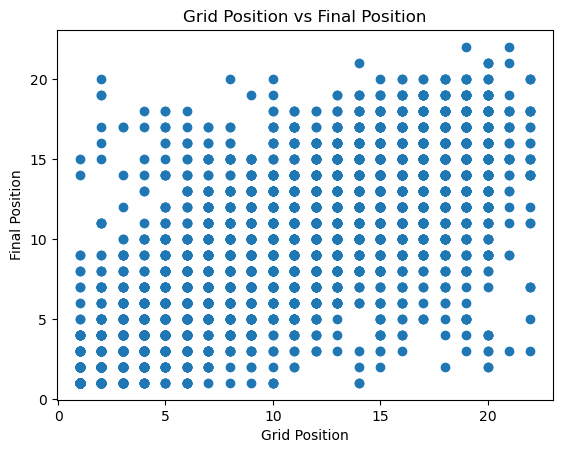

In [274]:
# Scatter plot to visualize the relationship between grid position and finishing position
plt.scatter(results_final['grid'], results_final['position'])
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.title('Grid Position vs Final Position')
plt.show()


In [275]:
# Calculate Spearman's rank correlation
corr, p_value = spearmanr(results_final['grid'], results_final['position'])

print(f"Spearman correlation coefficient: {corr}, p-value: {p_value:.10f}")

if p_value < 0.05:
    print(f"Reject the null hypothesis, there's a significant correlation between qualifying and final position.")
else:
    print(f"Fail to reject the null hypothesis, no significant correlation between qualifying and final position.")



Spearman correlation coefficient: 0.7561394300122715, p-value: 0.0000000000
Reject the null hypothesis, there's a significant correlation between qualifying and final position.


## Correlation

In [276]:
results['fastestLapSpeed'] = results['fastestLapSpeed'].fillna(0) 
results['fastestLapSpeed'] = pd.to_numeric(results['fastestLapSpeed'], errors='coerce')

results['position'] = pd.to_numeric(results['position'], errors='coerce')
results['position'].dtype

dtype('float64')

In [277]:
results['fastestLapSpeed'].dtype

dtype('float64')

In [278]:
numeric_data = results.select_dtypes(include=[float,int]) 
numeric_data.head()

,resultId,raceId,driverId,constructorId,grid,position,points,laps,fastestLapSpeed,year,fastest_lap_time_seconds,avg_lap_time,avg_quali_time,no_of_pitstops
22127,22130,900,3,131,3,1.0,25.0,57,206.436,2014,92.478,97.872105,100.584667,2.0
22128,22131,900,825,1,4,2.0,18.0,57,205.131,2014,93.066,98.341877,100.813000,2.0
22129,22132,900,18,1,10,3.0,15.0,57,205.460,2014,92.917,98.398895,91.396000,2.0
22130,22133,900,4,6,5,4.0,12.0,57,204.867,2014,93.186,98.491123,101.008667,2.0
22131,22134,900,822,3,15,5.0,10.0,57,206.128,2014,92.616,98.707877,102.631667,2.0


In [279]:
numeric_data = numeric_data[['grid','points','laps','fastest_lap_time_seconds','avg_lap_time','avg_quali_time','no_of_pitstops','fastestLapSpeed','position']]
numeric_data.head()

,grid,points,laps,fastest_lap_time_seconds,avg_lap_time,avg_quali_time,no_of_pitstops,fastestLapSpeed,position
22127,3,25.0,57,92.478,97.872105,100.584667,2.0,206.436,1.0
22128,4,18.0,57,93.066,98.341877,100.813000,2.0,205.131,2.0
22129,10,15.0,57,92.917,98.398895,91.396000,2.0,205.460,3.0
22130,5,12.0,57,93.186,98.491123,101.008667,2.0,204.867,4.0
22131,15,10.0,57,92.616,98.707877,102.631667,2.0,206.128,5.0


<Axes: >

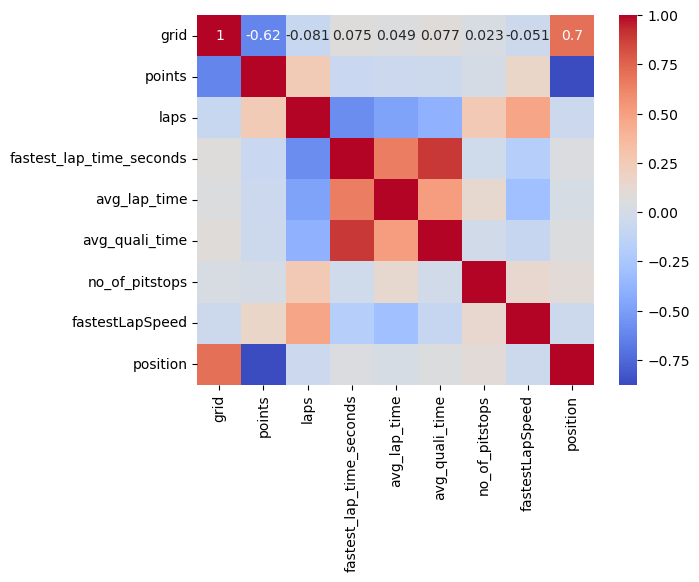

In [280]:
import seaborn as sns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm') 

1. Grid vs. Position:
0.7 Correlation: A strong positive correlation, meaning that as the grid position (starting position) increases (worsens), the finishing position also tends to increase (worsen).
2. Grid vs. Points:
-0.62 Correlation: A strong negative correlation, suggesting that drivers starting in better grid positions (lower grid values) tend to score more points.
3. Points vs. Laps, Avg Lap Time, and Fastest Lap Speed:
These correlations are low, indicating that the relationship between points scored and these variables is weak or non-existent.
4. Avg Lap Time vs. Fastest Lap Time:
Positive Correlation: Expected, as drivers who have faster average laps are likely to also have faster fastest laps, though the strength is not very high.
5. Avg Qualifying Time vs. Position:
Slight Positive Correlation: Indicates a slight tendency that drivers with slower average qualifying times end up in worse finishing positions, but the relationship is weak.
6. No. of Pitstops vs. Position:
Low Positive Correlation: Indicates a very weak trend that more pit stops might relate to worse finishing positions.

##### Summary:

Strongest Correlations: Grid position strongly correlates with final position and points, highlighting the importance of qualifying positions in race outcomes.

Weak Relationships: Most other variables show weak or no significant correlation, suggesting that factors like lap times and pit stops may not directly influence points or finishing positions in a straightforward manner.
This analysis suggests that starting position (grid) is a crucial factor in determining race outcomes, reflected by the strong correlations observed.

This plot shows a clear positive trend: as the grid position number increases (meaning drivers started further back), the final positions also tend to be higher numbers (indicating they finish further back).
This suggests that drivers starting closer to the front (lower grid positions) generally finish in better (lower) positions.
There are denser clusters of points along the diagonal from the bottom left to the top right, reinforcing the idea that qualifying positions are a strong indicator of final race outcomes.

In [281]:
## Exporting the dataframes created/used in this project to csv

# results.to_csv('F1results.csv', index=False)champions.to_csv('champions.csv', index=False)
# constructor_standings.to_csv('Constructor_standings.csv', index=False)
# top_3_drivers_each_year.to_csv('top_3_drivers_each_year.csv', index=False)
# top_teams.to_csv('top_teams.csv', index=False)
# top_3_constructors_each_year.to_csv('top_3_constructors_each_year.csv', index=False)
# fastest_track.to_csv('fastest_track.csv', index=False)
# result_dnf.to_csv('result_dnf.csv', index=False)
# most_improved.to_csv('most_improved.csv', index=False)
# result_time.to_csv('result_time.csv', index=False)
# result_speed.to_csv('result_speed.csv', index=False)
# result_podium.to_csv('result_podium.csv', index=False)
# results_final.to_csv('results_final.csv', index=False)
# fastest_track_groupby.to_csv('fastest_track_groupby.csv', index=False)